In [1]:
import yfinance as yf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as pp


In [2]:
# open up the csv file as a pandas dataframe

d1718 = pd.read_csv('17-18.csv')

d1718

,Name,Associate,Ticker,Pitch Date,Pitch Price,Curr
0,ABB Ltd,Matt Smith,ABB,06/03/2018,22.80,CHF
1,Alibaba Group Holding Ltd,Anna Erofeeva,BABA,05/12/2017,177.62,USD
2,Apple Inc,Darren Wyy,AAPL,16/01/2018,176.30,USD
3,Arista Networks Inc,Xu Jiawei,ANET,14/11/2017,225.50,USD
4,BHP Billiton Ltd,Matt Smith,BHP,05/12/2017,42.10,USD
5,BlackRock Inc,Marcus McLaney,BLK,27/02/2018,563.97,USD
6,Celgene Corp,Arjun Kandola,CELG,09/01/2018,105.46,USD
7,Domino's Pizza Inc,Dev Singh,DPZ,12/12/2017,180.96,USD
8,Estee Lauder Companies Inc,Kelvin Fang,EL,20/02/2018,139.65,USD
9,Foot Locker Inc,Arjun Kandola,FL,06/03/2018,42.10,USD


In [3]:
d1718['Ticker']

0        ABB
1       BABA
2       AAPL
3       ANET
4        BHP
5        BLK
6       CELG
7        DPZ
8         EL
9         FL
10        GM
11       HON
12    ITRK.L
13       KHC
14       MAR
15        MA
16     OTB.L
17      OSTK
18       RCL
19     RYA.L
20     SIEGY
21       STM
22      SBUX
23      SUPN
24      VNTV
25      USCR
26      SLCA
Name: Ticker, dtype: object

In [4]:
# example: show how we extract historic data 

data = yf.download('MSFT', start="2019-11-07", end="2019-11-08")

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-07,143.839996,144.880005,143.770004,144.259995,143.770782,17786700


In [5]:
data['Close'][0]

144.25999450683594

In [6]:
# download prices for all the stocks today 

today = np.datetime64('today', 'D')
yesterday = today - 1
i = -1
prices = {}


for item in d1718['Ticker']:
    i += 1
    try:
        data = yf.download(item, start=yesterday, end=today)
        prices[i] = data['Close'][0]
    except: 
        prices[i] = 0
        continue

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CELG: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[****************

In [7]:
prices

{0: 21.860000610351562,
 1: 186.77999877929688,
 2: 261.7799987792969,
 3: 194.49000549316406,
 4: 50.84000015258789,
 5: 485.0,
 6: 0,
 7: 285.760009765625,
 8: 193.17999267578125,
 9: 40.25,
 10: 35.33000183105469,
 11: 176.7899932861328,
 12: 5504.0,
 13: 30.540000915527344,
 14: 136.25,
 15: 282.57000732421875,
 16: 434.6000061035156,
 17: 7.570000171661377,
 18: 119.12999725341797,
 19: 13.6899995803833,
 20: 63.2400016784668,
 21: 23.8700008392334,
 22: 83.0199966430664,
 23: 21.760000228881836,
 24: 0,
 25: 39.959999084472656,
 26: 4.550000190734863}

In [8]:
pricesdf = pd.Series(prices)
pricesdf = pricesdf.round(decimals=2,)

pricesdf

0       21.86
1      186.78
2      261.78
3      194.49
4       50.84
5      485.00
6        0.00
7      285.76
8      193.18
9       40.25
10      35.33
11     176.79
12    5504.00
13      30.54
14     136.25
15     282.57
16     434.60
17       7.57
18     119.13
19      13.69
20      63.24
21      23.87
22      83.02
23      21.76
24       0.00
25      39.96
26       4.55
dtype: float64

In [9]:
d1718['Today Price'] = pricesdf

d1718

,Name,Associate,Ticker,Pitch Date,Pitch Price,Curr,Today Price
0,ABB Ltd,Matt Smith,ABB,06/03/2018,22.80,CHF,21.86
1,Alibaba Group Holding Ltd,Anna Erofeeva,BABA,05/12/2017,177.62,USD,186.78
2,Apple Inc,Darren Wyy,AAPL,16/01/2018,176.30,USD,261.78
3,Arista Networks Inc,Xu Jiawei,ANET,14/11/2017,225.50,USD,194.49
4,BHP Billiton Ltd,Matt Smith,BHP,05/12/2017,42.10,USD,50.84
5,BlackRock Inc,Marcus McLaney,BLK,27/02/2018,563.97,USD,485.00
6,Celgene Corp,Arjun Kandola,CELG,09/01/2018,105.46,USD,0.00
7,Domino's Pizza Inc,Dev Singh,DPZ,12/12/2017,180.96,USD,285.76
8,Estee Lauder Companies Inc,Kelvin Fang,EL,20/02/2018,139.65,USD,193.18
9,Foot Locker Inc,Arjun Kandola,FL,06/03/2018,42.10,USD,40.25


In [10]:
d1718['Price %'] = (d1718['Today Price'] - d1718['Pitch Price'])/d1718['Pitch Price']
d1718 = d1718.round(decimals=2)

d1718

,Name,Associate,Ticker,Pitch Date,Pitch Price,Curr,Today Price,Price %
0,ABB Ltd,Matt Smith,ABB,06/03/2018,22.80,CHF,21.86,-0.04
1,Alibaba Group Holding Ltd,Anna Erofeeva,BABA,05/12/2017,177.62,USD,186.78,0.05
2,Apple Inc,Darren Wyy,AAPL,16/01/2018,176.30,USD,261.78,0.48
3,Arista Networks Inc,Xu Jiawei,ANET,14/11/2017,225.50,USD,194.49,-0.14
4,BHP Billiton Ltd,Matt Smith,BHP,05/12/2017,42.10,USD,50.84,0.21
5,BlackRock Inc,Marcus McLaney,BLK,27/02/2018,563.97,USD,485.00,-0.14
6,Celgene Corp,Arjun Kandola,CELG,09/01/2018,105.46,USD,0.00,-1.00
7,Domino's Pizza Inc,Dev Singh,DPZ,12/12/2017,180.96,USD,285.76,0.58
8,Estee Lauder Companies Inc,Kelvin Fang,EL,20/02/2018,139.65,USD,193.18,0.38
9,Foot Locker Inc,Arjun Kandola,FL,06/03/2018,42.10,USD,40.25,-0.04


D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


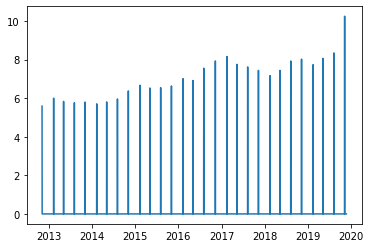

In [11]:
# example: show how we extract dividends

BP_Data = yf.Ticker("BP.L")

BP_Div = BP_Data.history(start="2012-11-07", end=today).Dividends

pp.plot(BP_Div)

In [12]:
sum(BP_Div)

204.58704000000003

In [13]:
divs = {}
i = -1

for item in d1718['Ticker']:
    i += 1
    try:
        div_date = str(d1718['Pitch Date'][i])
        year = div_date[-4:]
        month = div_date[3:-5]
        day = div_date[0:-8]
        div_date = year + '-' + month + '-' + day
        div_date = np.datetime64(div_date)   
        Div_Data = yf.Ticker(item)
        Total_Div = Div_Data.history(start=div_date, end=today).Dividends
        divs[i] = sum(Total_Div)
    except: 
        divs[i] = 0
        continue
        
divsdf = pd.Series(divs)
divsdf        

- VNTV: No data found for this date range, symbol may be delisted


0       1.623
1       0.000
2       5.860
3       0.000
4       7.060
5      21.920
6       0.000
7       4.610
8       2.860
9       2.520
10      2.660
11      5.670
12    181.100
13      3.475
14      3.410
15      2.320
16      4.600
17      0.000
18      4.780
19      0.000
20      4.329
21      0.420
22      2.810
23      0.000
24      0.000
25      0.000
26      0.375
dtype: float64

In [14]:
d1718['Total Divs'] = divsdf

d1718

,Name,Associate,Ticker,Pitch Date,Pitch Price,Curr,Today Price,Price %,Total Divs
0,ABB Ltd,Matt Smith,ABB,06/03/2018,22.80,CHF,21.86,-0.04,1.623
1,Alibaba Group Holding Ltd,Anna Erofeeva,BABA,05/12/2017,177.62,USD,186.78,0.05,0.000
2,Apple Inc,Darren Wyy,AAPL,16/01/2018,176.30,USD,261.78,0.48,5.860
3,Arista Networks Inc,Xu Jiawei,ANET,14/11/2017,225.50,USD,194.49,-0.14,0.000
4,BHP Billiton Ltd,Matt Smith,BHP,05/12/2017,42.10,USD,50.84,0.21,7.060
5,BlackRock Inc,Marcus McLaney,BLK,27/02/2018,563.97,USD,485.00,-0.14,21.920
6,Celgene Corp,Arjun Kandola,CELG,09/01/2018,105.46,USD,0.00,-1.00,0.000
7,Domino's Pizza Inc,Dev Singh,DPZ,12/12/2017,180.96,USD,285.76,0.58,4.610
8,Estee Lauder Companies Inc,Kelvin Fang,EL,20/02/2018,139.65,USD,193.18,0.38,2.860
9,Foot Locker Inc,Arjun Kandola,FL,06/03/2018,42.10,USD,40.25,-0.04,2.520


In [15]:
USD = yf.download('GBPUSD=X', start="2017-01-01", end=today)
EUR = yf.download('GBPEUR=X', start="2017-01-01", end=today)
CHF = yf.download('GBPCHF=X', start="2017-01-01", end=today)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
print(USD)

                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2017-01-02  1.234903  1.235941  1.228350  1.234903   1.234903       0
2017-01-03  1.228199  1.231072  1.220405  1.228199   1.228199       0
2017-01-04  1.224605  1.229710  1.222345  1.224560   1.224560       0
2017-01-05  1.232802  1.241773  1.227144  1.232681   1.232681       0
2017-01-06  1.242390  1.242390  1.230315  1.242545   1.242545       0
...              ...       ...       ...       ...        ...     ...
2019-11-18  1.291973  1.298212  1.291656  1.292123   1.292123       0
2019-11-19  1.294968  1.297185  1.292541  1.295085   1.295085       0
2019-11-20  1.292892  1.292892  1.289175  1.292950   1.292950       0
2019-11-21  1.292691  1.297017  1.290006  1.292708   1.292708       0
2019-11-22  1.291923  1.292992  1.282676  1.291990   1.291990       0

[751 rows x 6 columns]


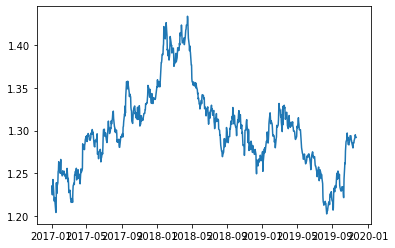

In [17]:
pp.plot(USD['Close'])

In [18]:
curr = {}
i = -1

for item in d1718['Curr']:
    i += 1
    curr_date = str(d1718['Pitch Date'][i])
    year = curr_date[-4:]
    month = curr_date[3:-5]
    day = curr_date[0:-8]
    curr_date = year + '-' + month + '-' + day
    curr_date = np.datetime64(curr_date) 
    
    if item == 'USD':
        USD_diff = 1 + (USD['Close'][curr_date] - USD['Close'][today-1])/USD['Close'][curr_date]
        curr[i] = USD_diff
    elif item == 'EUR':
        EUR_diff = 1 + (EUR['Close'][curr_date] - EUR['Close'][today-1])/EUR['Close'][curr_date]
        curr[i] = EUR_diff
    elif item == 'CHF':
        CHF_diff = 1 + (CHF['Close'][curr_date] - CHF['Close'][today-1])/CHF['Close'][curr_date]
        curr[i] = CHF_diff
    else: 
        curr[i] = 1
        
curr

{0: 1.0168690485253806,
 1: 1.0412144398586043,
 2: 1.0636562830783138,
 3: 1.0155038682231607,
 4: 1.0412144398586043,
 5: 1.074935389268614,
 6: 1.0479973634135151,
 7: 1.0321704788106139,
 8: 1.0766666885331542,
 9: 1.0673126405959288,
 10: 1.0821705837314788,
 11: 1.0710206657282582,
 12: 1,
 13: 1.0734108107479607,
 14: 1.0766666885331542,
 15: 1.0302066865123325,
 16: 1,
 17: 1.074935389268614,
 18: 1.0479973634135151,
 19: 0.9652351749081739,
 20: 0.9732253552761073,
 21: 0.9678696024136264,
 22: 1.0302066865123325,
 23: 1.0761499010982125,
 24: 1.0005555135969422,
 25: 1.0710206657282582,
 26: 1.0734108107479607}

In [19]:
currdf = pd.Series(curr)
currdf = currdf.round(decimals=2,)

currdf

0     1.02
1     1.04
2     1.06
3     1.02
4     1.04
5     1.07
6     1.05
7     1.03
8     1.08
9     1.07
10    1.08
11    1.07
12    1.00
13    1.07
14    1.08
15    1.03
16    1.00
17    1.07
18    1.05
19    0.97
20    0.97
21    0.97
22    1.03
23    1.08
24    1.00
25    1.07
26    1.07
dtype: float64

In [20]:
d1718['Currency Δ'] = currdf

d1718

,Name,Associate,Ticker,Pitch Date,Pitch Price,Curr,Today Price,Price %,Total Divs,Currency Δ
0,ABB Ltd,Matt Smith,ABB,06/03/2018,22.80,CHF,21.86,-0.04,1.623,1.02
1,Alibaba Group Holding Ltd,Anna Erofeeva,BABA,05/12/2017,177.62,USD,186.78,0.05,0.000,1.04
2,Apple Inc,Darren Wyy,AAPL,16/01/2018,176.30,USD,261.78,0.48,5.860,1.06
3,Arista Networks Inc,Xu Jiawei,ANET,14/11/2017,225.50,USD,194.49,-0.14,0.000,1.02
4,BHP Billiton Ltd,Matt Smith,BHP,05/12/2017,42.10,USD,50.84,0.21,7.060,1.04
5,BlackRock Inc,Marcus McLaney,BLK,27/02/2018,563.97,USD,485.00,-0.14,21.920,1.07
6,Celgene Corp,Arjun Kandola,CELG,09/01/2018,105.46,USD,0.00,-1.00,0.000,1.05
7,Domino's Pizza Inc,Dev Singh,DPZ,12/12/2017,180.96,USD,285.76,0.58,4.610,1.03
8,Estee Lauder Companies Inc,Kelvin Fang,EL,20/02/2018,139.65,USD,193.18,0.38,2.860,1.08
9,Foot Locker Inc,Arjun Kandola,FL,06/03/2018,42.10,USD,40.25,-0.04,2.520,1.07


In [21]:
total = {}
i = -1

for today_price in d1718['Today Price']:
    i += 1
    pitch_price = d1718['Pitch Price'][i]
    total_divs = d1718['Total Divs'][i]
    currency_Δ = d1718['Currency Δ'][i]
    total[i] = (((today_price + total_divs) - pitch_price) * currency_Δ)/pitch_price

totaldf = pd.Series(total)
totaldf = totaldf.round(decimals=2,)

d1718['Total %'] = totaldf

d1718

,Name,Associate,Ticker,Pitch Date,Pitch Price,Curr,Today Price,Price %,Total Divs,Currency Δ,Total %
0,ABB Ltd,Matt Smith,ABB,06/03/2018,22.80,CHF,21.86,-0.04,1.623,1.02,0.03
1,Alibaba Group Holding Ltd,Anna Erofeeva,BABA,05/12/2017,177.62,USD,186.78,0.05,0.000,1.04,0.05
2,Apple Inc,Darren Wyy,AAPL,16/01/2018,176.30,USD,261.78,0.48,5.860,1.06,0.55
3,Arista Networks Inc,Xu Jiawei,ANET,14/11/2017,225.50,USD,194.49,-0.14,0.000,1.02,-0.14
4,BHP Billiton Ltd,Matt Smith,BHP,05/12/2017,42.10,USD,50.84,0.21,7.060,1.04,0.39
5,BlackRock Inc,Marcus McLaney,BLK,27/02/2018,563.97,USD,485.00,-0.14,21.920,1.07,-0.11
6,Celgene Corp,Arjun Kandola,CELG,09/01/2018,105.46,USD,0.00,-1.00,0.000,1.05,-1.05
7,Domino's Pizza Inc,Dev Singh,DPZ,12/12/2017,180.96,USD,285.76,0.58,4.610,1.03,0.62
8,Estee Lauder Companies Inc,Kelvin Fang,EL,20/02/2018,139.65,USD,193.18,0.38,2.860,1.08,0.44
9,Foot Locker Inc,Arjun Kandola,FL,06/03/2018,42.10,USD,40.25,-0.04,2.520,1.07,0.02


In [22]:
#d1718 = d1718.drop([6, 24])

d1718

,Name,Associate,Ticker,Pitch Date,Pitch Price,Curr,Today Price,Price %,Total Divs,Currency Δ,Total %
0,ABB Ltd,Matt Smith,ABB,06/03/2018,22.80,CHF,21.86,-0.04,1.623,1.02,0.03
1,Alibaba Group Holding Ltd,Anna Erofeeva,BABA,05/12/2017,177.62,USD,186.78,0.05,0.000,1.04,0.05
2,Apple Inc,Darren Wyy,AAPL,16/01/2018,176.30,USD,261.78,0.48,5.860,1.06,0.55
3,Arista Networks Inc,Xu Jiawei,ANET,14/11/2017,225.50,USD,194.49,-0.14,0.000,1.02,-0.14
4,BHP Billiton Ltd,Matt Smith,BHP,05/12/2017,42.10,USD,50.84,0.21,7.060,1.04,0.39
5,BlackRock Inc,Marcus McLaney,BLK,27/02/2018,563.97,USD,485.00,-0.14,21.920,1.07,-0.11
6,Celgene Corp,Arjun Kandola,CELG,09/01/2018,105.46,USD,0.00,-1.00,0.000,1.05,-1.05
7,Domino's Pizza Inc,Dev Singh,DPZ,12/12/2017,180.96,USD,285.76,0.58,4.610,1.03,0.62
8,Estee Lauder Companies Inc,Kelvin Fang,EL,20/02/2018,139.65,USD,193.18,0.38,2.860,1.08,0.44
9,Foot Locker Inc,Arjun Kandola,FL,06/03/2018,42.10,USD,40.25,-0.04,2.520,1.07,0.02


In [23]:
d1718.to_csv(r'C:\Users\seanl\Documents\Coding\Citadel\18-19x.csv')